In [159]:
import numpy as np
import pandas as pd
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt

# Carga General de Datos:

En este apartado se cargan todos los datos generales para realizar las correspondientes gráficas y análisis.

In [160]:
path = "C:/Users/Darck/Modern_Phy_Lab/4 Efecto Zeeman/data/CSV/"

# Información relativa al Cadmio:
Cadmium_parallel = pd.read_csv(path + "Cd_conB_paral_10s.csv")
Cadmium_perpend = pd.read_csv(path + "Cd_conB_perp_10s.csv")

#Información relativa al Neón:
Neon_parallel = pd.read_csv(path + "Ne_conB_paral_10s.csv")
Neon_perpend = pd.read_csv(path + "Ne_conB_perp_10s.csv")

#Información relativa a las Escalas:
Neon_Argon = pd.read_csv(path + "Calib_NeAr_10s.csv")
Neon_Cadmium = pd.read_csv(path + "Calib_NeCd_10s.csv")

axis = Cadmium_parallel["Distance_(pixels)"].to_numpy()

# Cadmio - Campos Magnéticos:

In [201]:
def Search4Lines(df,vecref,lines):
    max_list = np.array([])
    vecref = np.sort(vecref)[::-1][:lines]
    vecref = vecref
    for i in range(len(df["Gray_Value"])):
        if df["Gray_Value"][i] in vecref:
            max_list = np.append(max_list, i)
    return max_list

## Paralelo:

Text(0.5, 1.0, 'Espectro del Cadmio con $\\vec{B} \\parallel$')

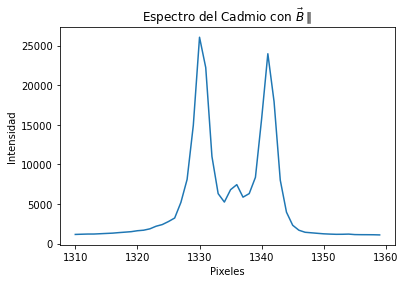

In [161]:
init, final = 1310, 1360
Cd_parallel = Cadmium_parallel["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Cd_parallel)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \parallel$")

In [202]:
Cd_Parallel_Lines = Search4Lines(Cadmium_parallel, Cd_parallel, 2)
Cd_Parallel_Lines

array([1330., 1341.])

## Perpendicular:

Text(0.5, 1.0, 'Espectro del Cadmio con $\\vec{B} \\perp$')

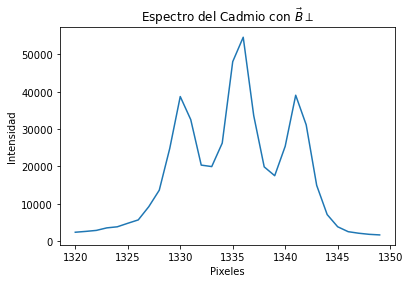

In [220]:
init, final = 1320, 1350
Cd_perpend = Cadmium_perpend["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Cd_perpend)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \perp$")

In [221]:
Cd_Perpend_Lines = Search4Lines(Cadmium_perpend, Cd_perpend, 3)
Cd_Perpend_Lines[Cd_Perpend_Lines == 1335] = 1330 
Cd_Perpend_Lines

array([1330., 1336., 1341.])

# Neón - Campos Magnéticos:

## Paralelo:

Text(0.5, 1.0, 'Espectro del Cadmio con $\\vec{B} \\parallel$')

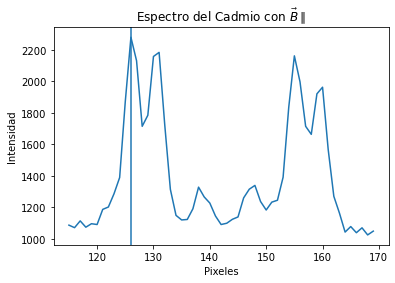

In [238]:
init, final = 115, 170
Ne_parallel = Neon_parallel["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Ne_parallel)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \parallel$")

In [239]:
Ne_Parallel_Lines = Search4Lines(Neon_parallel, Ne_parallel, 4)
Ne_Parallel_Lines[Ne_Parallel_Lines == 130] = 160
Ne_Parallel_Lines = np.sort(Ne_Parallel_Lines)
Ne_Parallel_Lines

array([126., 131., 155., 160.])

## Perpendicular:

Text(0.5, 1.0, 'Espectro del Cadmio con $\\vec{B} \\parallel$')

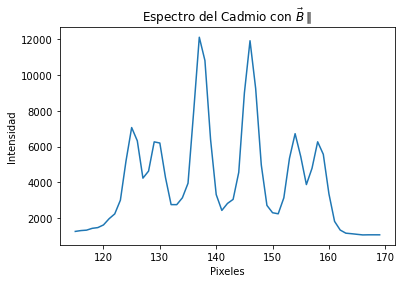

In [258]:
init, final = 115, 170
Ne_perpend = Neon_perpend["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Ne_perpend)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \parallel$")

In [259]:
Ne_Perpend_Lines = np.array([125, 129, 137, 146, 154, 158])
Ne_Perpend_Lines

array([125, 129, 137, 146, 154, 158])

# Calibración de las Escalas:

En este apartado se encuentra la calibración para las escalas del Cadmio y Neón para encontrar las distancias relativas en píxeles y obtener una escala útil para medir las distancias entre líneas espectrales.

In [165]:
def Search4Max(df,vecref):
    for i in range(len(df["Gray_Value"])):
        if df["Gray_Value"][i] == np.max(vecref):
            maxin = i
    return maxin

def lenght_factor(dlambda, dpix):
    return dlambda/dpix

def lenght_between(diffpix,diff,diff_pix_recorded):
    return (diff/(diffpix))*diff_pix_recorded

In [166]:
Ar_line = 723.3606e-9 # metros
Cd_line = 643.847e-9 # metros
Ne_line = 724.516e-9 # metros

dCd_Ne = np.abs(Ne_line - Cd_line)
dAr_Ne = np.abs(Ar_line - Ne_line)

In [167]:
NeAr = Neon_Argon["Gray_Value"].to_numpy()
NeCd = Neon_Cadmium["Gray_Value"].to_numpy()

# Análisis del Neón y Argón:

In [168]:
max_Ar = Search4Max(Neon_Argon,NeAr[600::])
max_Ne = Search4Max(Neon_Argon,NeAr[0:600])
dpxNeAr = np.abs(max_Ne - max_Ar)
max_Ar, max_Ne

(1203, 54)

Text(0.5, 1.0, 'Espectros de Ne y Ar')

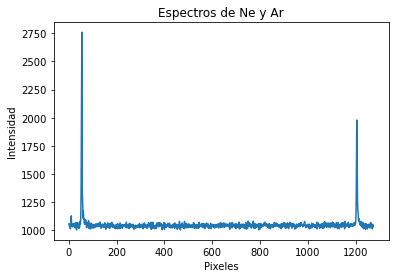

In [169]:
plt.plot(axis[1:1274], NeAr)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros de Ne y Ar")

In [170]:
Gamma_NeAr = lenght_factor(dAr_Ne, dpxNeAr)
Gamma_NeAr

1.0055700609225251e-12

# Análisis del Neón y Cadmio:

In [171]:
max_Cd = Search4Max(Neon_Cadmium,NeCd[600::])
max_Ne_ = Search4Max(Neon_Cadmium,NeCd[0:600])
dpxNeCd = np.abs(max_Ne_ - max_Cd)
max_Cd, max_Ne_

(1239, 23)

Text(0.5, 1.0, 'Espectros de Ne y Cd')

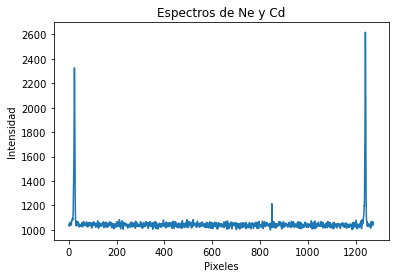

In [145]:
plt.plot(axis[1:1274], NeCd)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros de Ne y Cd")

In [172]:
Gamma_NeCd = lenght_factor(dCd_Ne, dpxNeCd)
Gamma_NeCd

6.633963815789475e-11